In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss



In [3]:
def check_normalteste(series):
    #calculate
    stat, p = normaltest(series)
    print (f'Statistic={stat}, p={p}')
    print ('--'*25) 

    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [4]:
def rolling_mean(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(24*365).mean()
    rolstd = timeseries.rolling(24*365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [5]:
def test_stationarity(timeseries): 
    # ADF Test
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

    # KPSS Test
    print('\nResults of KPSS Test:')
    result = kpss(timeseries, regression='c')
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

In [8]:
df = pd.read_csv('timeserie_train.csv', parse_dates=['data'], index_col='data')

In [9]:
energia = df['energia']

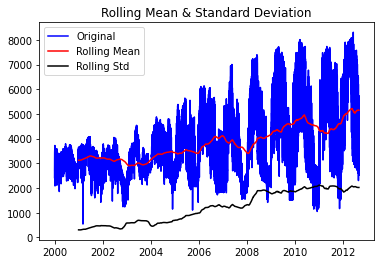

Results of Dickey-Fuller Test:
ADF Statistic: -5.779569636396229
p-value: 5.163572272797296e-07
Critial Values:
   1%, -3.4304090208531304
Critial Values:
   5%, -2.8615660863204235
Critial Values:
   10%, -2.5667838848306594

Results of KPSS Test:
KPSS Statistic: 32.471183
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/nivaldogomes-labcodes/Documents/Dropbox/My Mac (Home-Nivaldos-MacBook-Pro.local)/Documents/1 - Projetos/modelagem analitica/.env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/nivaldogomes-labcodes/Documents/Dropbox/My Mac (Home-Nivaldos-MacBook-Pro.local)/Documents/1 - Projetos/modelagem analitica/.env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), Int

In [10]:
rolling_mean(df)
test_stationarity(df)

In [11]:
from arch.unitroot import ADF
adf = ADF(df)
print(adf.summary().as_text())

from arch.unitroot import DFGLS
dfgls = DFGLS(df)
print(dfgls.summary().as_text())

from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(df)
print(pp.summary().as_text())

from arch.unitroot import KPSS
kpss = KPSS(df)
print(kpss.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.780
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                 -4.051
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -18.606
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Nu

In [ ]:
df["energia"] = np.log(df["energia"])
rolling_mean(df)
test_stationarity(df)

In [1]:
from arch.unitroot import ADF
adf = ADF(ts_log)
print(adf.summary().as_text())

from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(ts_log)
print(pp.summary().as_text())

from arch.unitroot import KPSS
kpss = KPSS(ts_log)
print(kpss.summary().as_text())

NameError: name 'ts_log' is not defined

In [ ]:
fitted_data, fitted_lambda = stats.boxcox(energia) 
rolling_mean(pd.DataFrame(fitted_data))
test_stationarity(fitted_data)

In [ ]:
from arch.unitroot import ADF
adf = ADF(fitted_data)
print(adf.summary().as_text())

from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(fitted_data)
print(pp.summary().as_text())

from arch.unitroot import KPSS
kpss = KPSS(fitted_data)
print(kpss.summary().as_text())